# <span style="color:blue; font-weight:bold;">4강. 데이터 정제와 그래프 시각화</span>
- 둘째마당 (07-08장)
- pp.177-221

In [1]:
# 그래프 해상도 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '100'})
%config InlineBackend.figure_format = 'retina'

# 07. 데이터 정제 - 빠진 데이터, 이상한 데이터 제거하기

## 07-1. 빠진 데이터를 찾아라! - 결측치 정제하기 (178-185쪽)

### [Do it! 실습] 결측치 찾기(178쪽)
- 결측치 : 누락된 값, 비어 있는 값
- 결측치 있는 경우 : 함수가 적용되지 않거나, 분석 결과가 왜곡되는 문제 발생
- 실제 데이터 분석시, 결측치 여부 확인해서 제거하는 정제 과정을 거친 다음에 분석해야 함

#### 결측치 만들기
- Numpy 패키지의 np.nan을 입력 -> NaN으로 표시

In [2]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'sex'   : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, np.nan]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [3]:
# NaN이 있는 상태로 연산하면 출력 결과도 NaN이 된다

df['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

#### 결측치 확인하기
- pd.isna()를 이용하면 결측치 포함 여부를 알 수 있다.
- pd.isna().sum()으로 결측치 총 개수를 알 수 있다.

In [4]:
pd.isna(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [5]:
pd.isna(df).sum()

sex      1
score    1
dtype: int64

### [Do it! 실습] 결측치 제거하기(180쪽)
- df.dropna() 이용하면 결측치가 있는 "행"을 제거할 수 있다.
- 이 때 결측치의 위치는 subset에 []를 이용해서 변수명을 입력하면 된다.
- subset: '부분집합'이라는 의미

#### 결측치 있는 행 제거하기

In [5]:
# score 열의 결측치를 제거라하 


In [8]:
# score의 결측치 제거해서 df_nomiss에 저장하라


#### 여러 번수에 결측치 없는 데이터 추출하기
- df.dropna()의 subset에 변수를 나열하면, 여러 변수에 결측치가 없는 행을 추출할 수 있다.

In [10]:
# score와 sex의 두 변수에 있는 결측치를 제거해서 변수 df_nomiss에 저장하라


#### 결측치가 하나라도 있으면 제거하기
- df.dropna()에 아무 변수도 지정하지 않으면 모든 변수에 결측치가 없는 행만 남긴다.
- 단, 이 경우 분석에 필요한 행까지 손실되는 단점이 있음 -> 변수를 직접 지정해 결측치 제거하는 것을 권장 (-> 181~182쪽 설명)

In [11]:
df_nomiss2 = df.dropna()
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


### [Do it! 실습] 결측치 대체하기(182쪽)
- 데이터가 작고 결측치가 많을 때, 결측치를 제거하면 너무 많은 데이터가 손실되어 분석 결과가 왜곡되는 문제 발생
- 이 때, 결측치를 제거하는 대신, 다른 값으로 채워 넣기도 함 = 결측치 대체법
- 대표값(평균값이나 최빈값 등)으로 대체하거나, 통계 분석 기법으로 결측치의 예측값을 추정해 대체함

#### 평균값으로 결측치 대체하기

In [12]:
# exam.csv 파일을 불러와 일부 값을 결측지로 바꿈

exam = pd.read_csv('exam.csv')           # 데이터 불러오기
exam.loc[[2, 7, 14], ['math']] = np.nan  # 2, 7, 14행의 math에 NaN 할당  
                                         # df.loc[]는 데이터 위치 지정하는 역할 [ , ]에서 쉼표 왼쪽은 행 위치, 오른쪽은 열 위치를 의미
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [13]:
# math의 평균값 : mean()의 경우 자동으로 결측치 제외하고 평균 구함 (182쪽 참조)


# math의 평균값을 구하라
exam['math'].mean()

55.23529411764706

In [14]:
# 결측치를 평균값으로 정한 55로 대체하라
exam['math'] = exam['math'].fillna(55)
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


### [개인 실습] 혼자서 해보기(185쪽)
- 결측치가 들어 있는 mpg 데이터를 이용해 분석 문제를 해결해 보세요

In [16]:
# 일부러 몇 개의 결측치를 입력하기

# mpg 데이터 불러오기
mpg = pd.read_csv('mpg.csv')

# NaN 할당하기
mpg.loc[[64, 123, 130, 152, 211], 'hwy'] = np.nan

mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28.0,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29.0,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26.0,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26.0,p,midsize


#### Q1. drv(구동 방식)별로 hwy(고속도로 연비) 평균이 어떻게 다른지 알아보려 합니다. 분석 전에 우선 두 변수에 결측치가 있는지 확인해야 합니다. drv 변수와 hwy 변수에 결측치가 몇 개 있는지 알아보세요
- 힌트 : 결측치 확인하는 df.isna()와 합계를 구하는 sum()를 조합해 보세요

In [17]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact


In [19]:
# drv 변수와 hwy 변수에 있는 결측치 개수를 확인하라


#### Q2. df.dropna()를 이용해 hwy변수의 결측치를 제거하고, 어떤 구동방식의 hwy 평균이 높은지 알아보세요. 하나의 pandas 구문으로 만들어야 합니다.

In [9]:
# (메서드 체이닝 방식)


In [10]:
# 다른 방식
mpg_new = mpg.dropna(subset = ['hwy'])
mpg_new.groupby(['drv'])['hwy'].mean()

drv
4    19.174757
f    28.160377
r    21.000000
Name: hwy, dtype: float64

## 07-2. 이상한 데이터를 찾아라! - 이상치 정제하기 (186-195쪽)
- 이상치 : 정상 범위에서 크게 벗어난 값
- 이상치가 들어 있으면 분석 결과가 왜곡되므로 분석에 앞서 이상치를 제거하는 작업을 해야 함

### [Do it! 실습] 이상치 제거하기 - 존재할 수 없는 값(186쪽)
- 논리적으로 존재할 수 없는 값이 들어 있을 때가 있다.
    - 예 : 남자는 1, 여자는 2로 되어 있는 성별 변수에 3이라는 값이 들어있는 경우

In [11]:
# 이상치 들어 있는 데이터 생성 (1, 2로 분류되는 'sex' 변수, 1~5점으로 된 score 변수)
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


#### 이상치 확인하기
- df.value_counts() 이용해 빈도표를 만들면 됨

In [14]:
# df.value_counts()에 sort_index()를 적용하면 빈도 기준으로 내림차순 정렬하지 않고, 변수의 값 순서로 정렬

In [13]:
df['score'].value_counts().sort_index()

score
2    1
3    1
4    2
5    1
6    1
Name: count, dtype: int64

#### 결측 처리하기
- 확인한 이상치를 결측치로 변환
- np.where()를 이용해 이상치에 NaN을 부여

In [15]:
# sex가 3이면 NaN 부여


In [16]:
# score가 5보다 크면 NaN 부여


In [17]:
# df.dropna() 이용해 결측치 제거한 다음 성별에 따른 score 평균을 구한다.


In [24]:
# np.where()는 반환 값 중 문자가 있으면, np.nan을 지정해도 결측치 NaN이 아니라 문자 'nan'을 반환
# 이 경우엔 먼저 np.where() 이용해 결측치로 만들 값에 특정 문자(예: 'etc')를 부여 -> df.replace() 이용해 그 문자를 np.nan으로 변환
# (189쪽 참조)

### [Do it! 실습] 이상치 제거하기 - 극단적인 값(190쪽)
- 논리적으로 존재할 수 있지만 극단적으로 크거나 작은 값 = 극단치
    - 예 : 몸무게 변수에 200kg 이상의 값이 있는 경우
- 극단치 제거 위해서는 먼저 어디까지를 정상 범위로 볼 것인가를 정해야 함
    - 논리적 판단에 의한 방법 : 성인 몸무게의 정상 범위를 40~150kg로 설정
    - 통계적 기준 이용 : 상하위 0.3% 또는 +-3 표준편차에 해당하는 값을 극단치로 간주
- 상자 그림으로 극단치 기준 정하기
    - 상자 그림 : 데이터의 분포를 직사각형의 상자 모양으로 표현한 그래프 -> 데이터의 분포를 한눈에 알 수 있음

#### 상자 그림 살펴보기
- mpg 데이터의 hwy 변수로 상자 그림 작성. seaborn 패키지의 boxplot() 이용

<Axes: ylabel='hwy'>

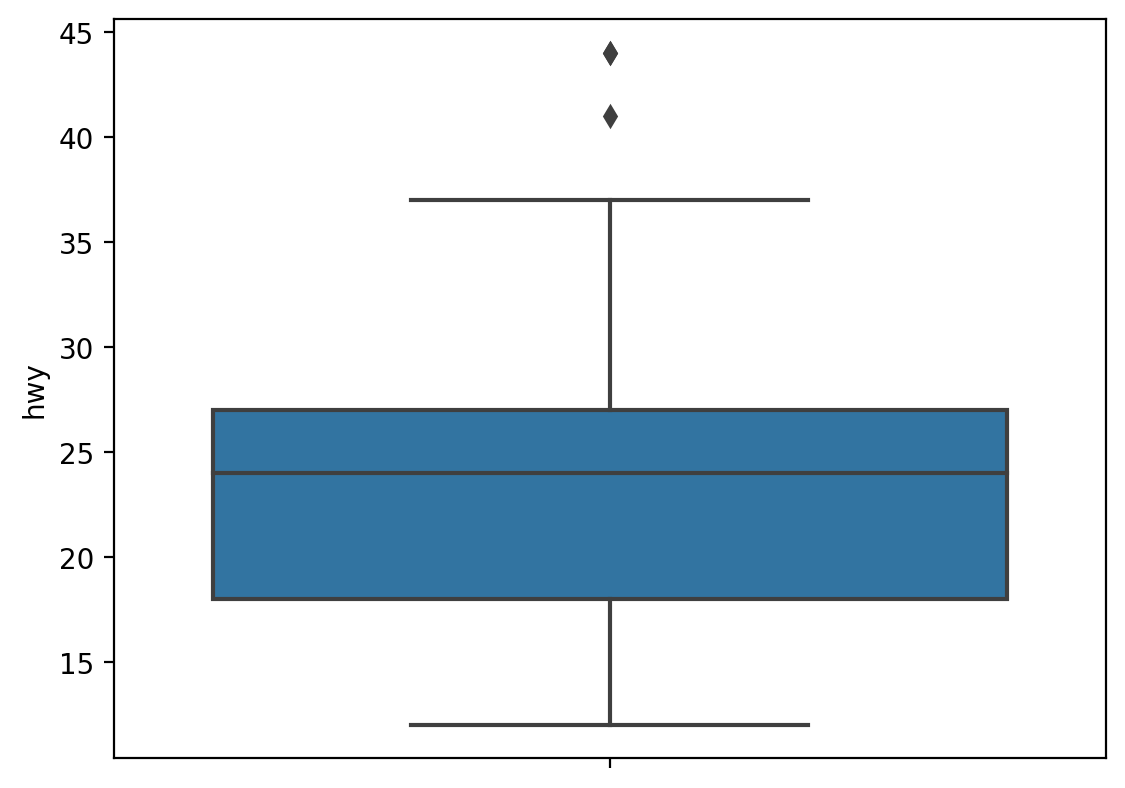

In [18]:
import pandas as pd
mpg = pd.read_csv('mpg.csv')

import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

- 상자 그림 : 값을 크기 순으로 나열해 4등분 했을 때 위치하는 값인 '사분위수'를 이용해 만듦
- 상자 그림의 요소가 나타내는 값 -> 교재 191쪽

- [quantile, quartile, percentile 개념 정리](https://blog.eunsukim.me/posts/understanding-quantile-quartile-and-percentile)

#### 극단치 기준값 구하기

In [19]:
# 1사분위수, 3사분위수 구하기 : df.quantile() 이용

pct25 = mpg['hwy'].quantile(.25) # 하위 25%에 해당하는 1사분위수
pct25

18.0

In [20]:
pct75 = mpg['hwy'].quantile(.75) # 하위 75%에 해당하는 3사분위수
pct75

27.0

In [21]:
# IQR 구하기 : IQR(inter quartile range, 사분위 범위) <- 1사분위수와 3사분위수 간의 거리

iqr = pct75 - pct25
iqr

9.0

In [22]:
# 하한, 상한 구하기 : 극단치의 경계값 (하한 - 1사분위수보다 'IQR의 1.5배'만큼 더 작은 값, 상한 - 3사분위수보다 더 큰 값)

pct25 - 1.5 * iqr # 하한

4.5

In [23]:
pct75 + 1.5 * iqr # 상한

40.5

In [24]:
# 극단치를 결측 처리하기 : np.where() 이용. 여러 조건 입력시 각 조건을 괄호로 감싸도록 주의


In [25]:
# 결측치 빈도 확인


In [26]:
# 해당 값 확인
mpg[mpg['hwy'].isna()]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category


In [27]:
# 결측치 제거하고 분석하기 : 제거 -> drv(구동방식)에 따라 hwy 평균이 어떻게 다른지 알아보기


### [개인 실습] 혼자서 해보기(194쪽)
- 이상치가 들어 있는 mpg 데이터를 이용해 분석 문제를 해결해 보세요

In [28]:
# mpg 데이터불러와  일부러 이상치 작성: drv(구동 방식) 변수의 값은 4(사륜구동), f(전륜구동), r(후륜구동) 세 종류. 몇 개의 행에 존재할 수 없는 값 k를 할당
# cty(도시 연비) 변수도 몇 개의 행에 극단적으로 크거나 작은 값을 할당

# mpg 데이터 불러오기
mpg = pd.read_csv('mpg.csv')

# drv 이상치 할당
mpg.loc[[9, 13, 57, 92], 'drv'] = 'k'

# cty 이상치 할당
mpg.loc[[28, 42, 128, 202], 'cty'] = [3, 4, 39, 42]
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [35]:
# 구동방식(drv)별로 도시 연비가 어떻게 다른지 알아보려 한다. 분석 하기 전에 우선 두 변수에 이상치가 있는지 확인하려 한다.

#### Q1: drv에 이상치 있는지 확인. 이상치를 결측 처리한 다음 이상치가 사라졌는지 확인. 결측 처리할 때는 df.isin()을 활용하라

In [29]:
# 이상치 확인


In [30]:
# 결측치 처리


In [31]:
# 이상치 확인


#### Q2: 상자 그림 이용해 cty에 이상치 있는지 확인하라. 
- 상자 그림 기준으로 정상 범위를 벗어난 값을 결측 처리한 다음 다시 상자 그림을 만들어 이상치가 사라졌는지 확인하라

In [32]:
# 상자 그림을 이용해 cty에 이상치가 있는지 확인하라


In [33]:
# 상자 그림 기준으로 정상 범위 벗어난 값을 결측 처리하라

pct25 = mpg['cty'].quantile(.25)
pct75 = mpg['cty'].quantile(.75)
iqr = pct75 - pct25
lowest = pct25 - iqr * 1.5
highest = pct75 + iqr * 1.5

In [34]:
print(lowest)
print(highest)

6.5
26.5


In [36]:
# 극단치를 결측치로 변환


In [38]:
# 결측치 제거


In [39]:
# 상자 그림에서 이상치가 사라졌는지 확인하라


In [40]:
# 이상치 제거 후 drv별로 cty 평균이 어떻게 다른지 알아보라. 하나의 pandas 구문으로 만들어라


# 08. 그래프 만들기
- 데이터를 그래프로 표현하면 특징을 쉽게 이해할 수 있다.

## 08-1. 파이썬으로 만들 수 있는 그래프 살펴보기(197-198쪽)
- 그래프 : 데이터를 보기 쉽게 그림으로 표현한 것
- 데이터를 그래프로 표현하면 추세와 경향성이 드러나기 때문에 특징을 쉽게 이해할 수 있고, 그래프를 만드는 과정에서 새로운 패턴을 발견하기도 한다.
- 분석 결과를 발표할 때, 그래프를 활용하면 데이터의 특징을 잘 전달할 수 있다.

- seaborn은 그래프를 만들 때 많이 사용하는 패키지

## 08-2. 산점도 - 변수 간 관계 표현하기(199-204쪽)
- 산점도(scatter plot) : 데이터를 x축과 y축에 점으로 표현한 그래프
- 나이와 소득처럼 **연속값으로 된 두 변수의 관계를 표현**할 때 사용

### [Do it! 실습] 산점도 만들기(199쪽)
- sns.scatterplot() 이용
- data에 그래프를 그리는 데 사용할 데이터 프레임을 입력,
- x축과 y축에 사용할 변수를 ''를 이용해 문자 형태로 입력

In [41]:
# mpg 데이터 불러옴

import pandas as pd
mpg = pd.read_csv('mpg.csv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


<Axes: xlabel='displ', ylabel='hwy'>

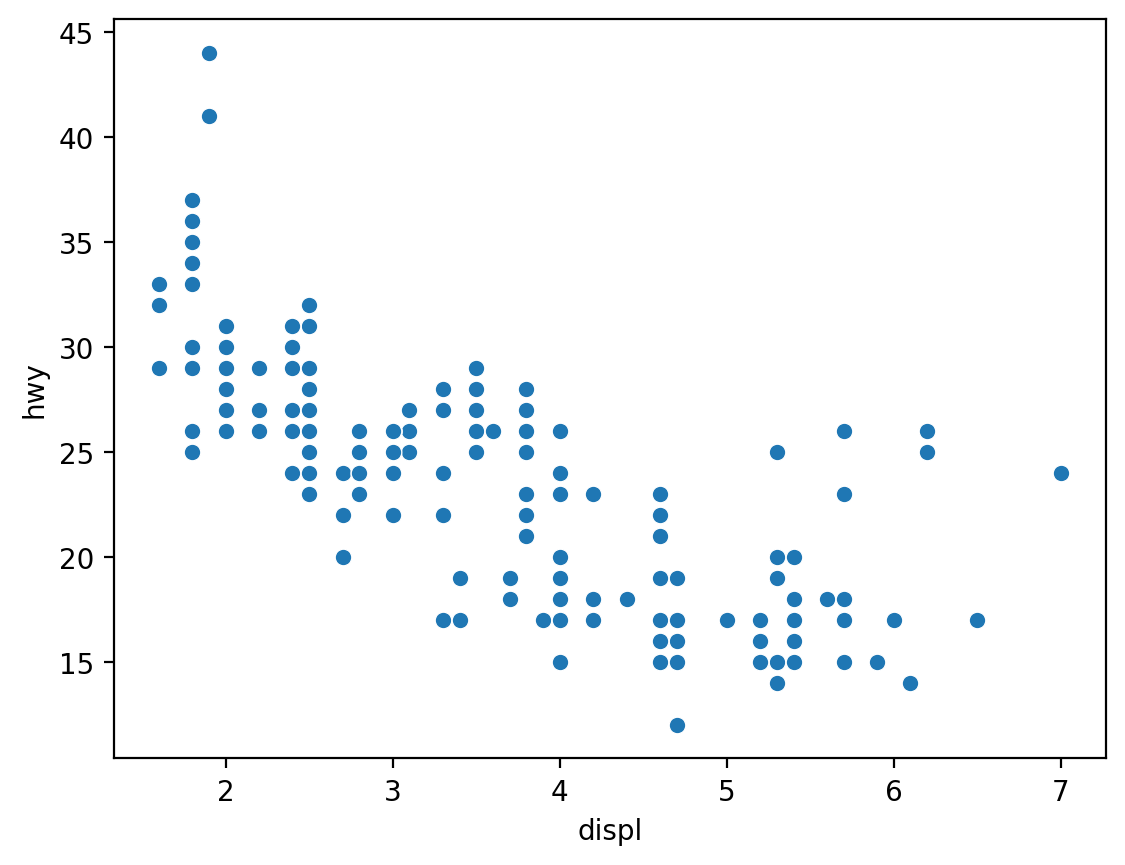

In [42]:
# x축은 displ, y축은 hwy를 나타낸 산점도 만들기

import seaborn as sns
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')

#### 축 범위 설정하기
- 필요성 : 데이터 전체가 아니라 일부만 표현하고 싶을 때 사용
- sns.set()의 xlim과 ylim 이용해 설정

[(3.0, 6.0)]

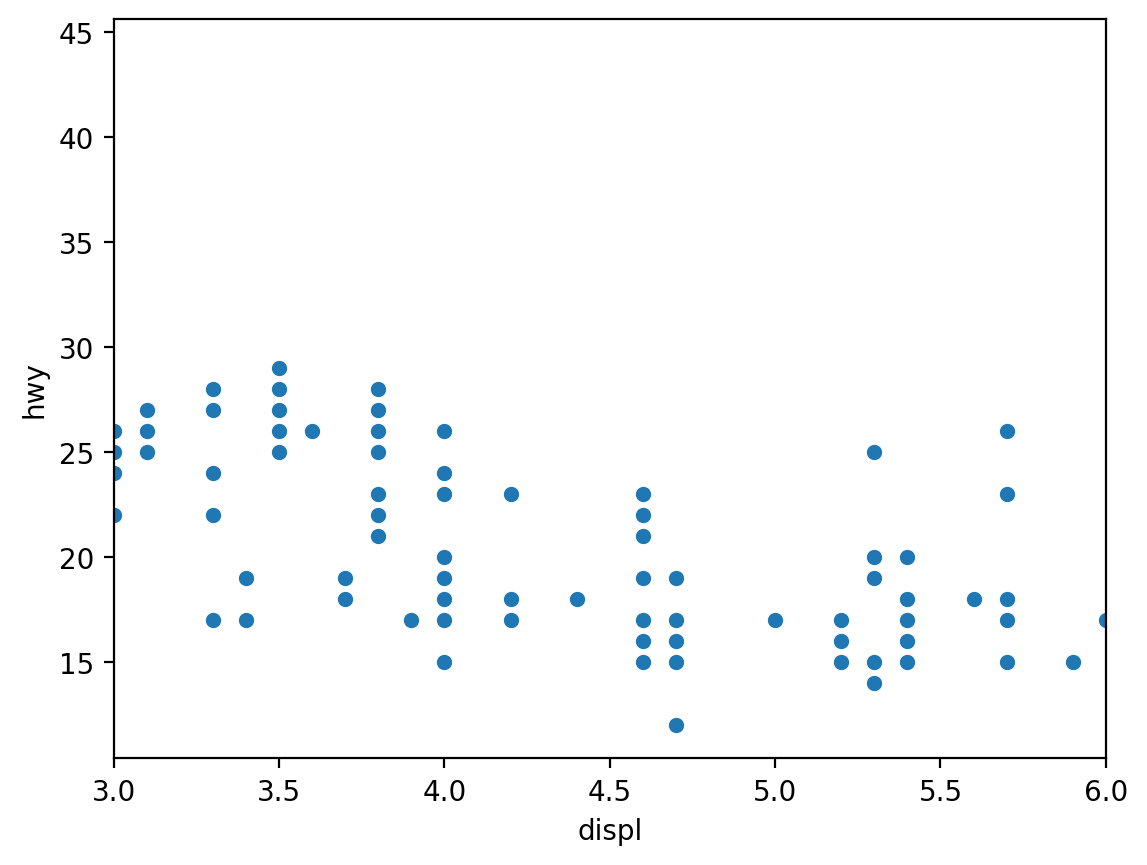

In [43]:
# x축 범위를 3-6으로 제한

sns.scatterplot(data = mpg, x = 'displ', y = 'hwy') \
   .set(xlim = [3, 6])

[(3.0, 6.0), (10.0, 30.0)]

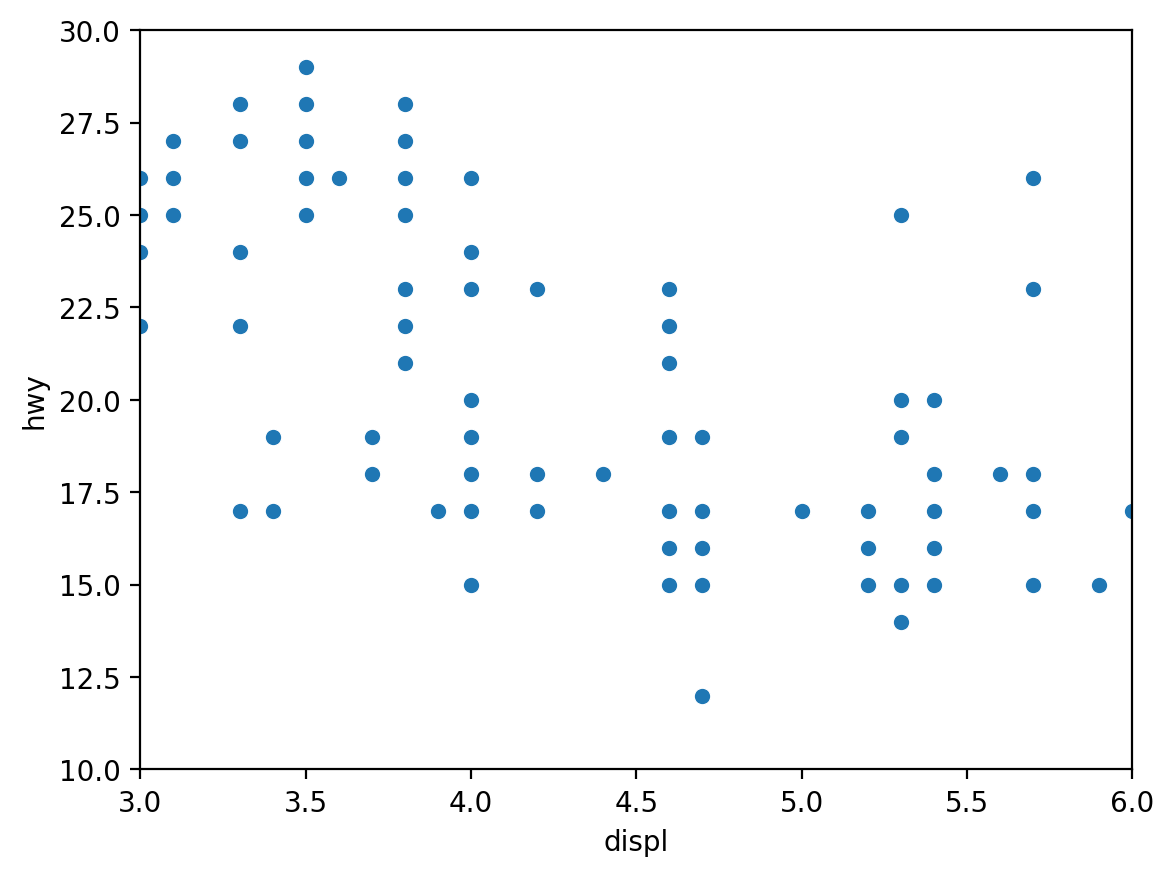

In [45]:
# 같은 방식으로 ylim을 이용하면 y축 범위를 제한할 수 있다.

sns.scatterplot(data = mpg, x = 'displ', y = 'hwy') \
   .set(xlim = [3, 6], ylim = [10, 30])

#### 종류별로 표식 색깔 바꾸기
- hue 이용

<Axes: xlabel='displ', ylabel='hwy'>

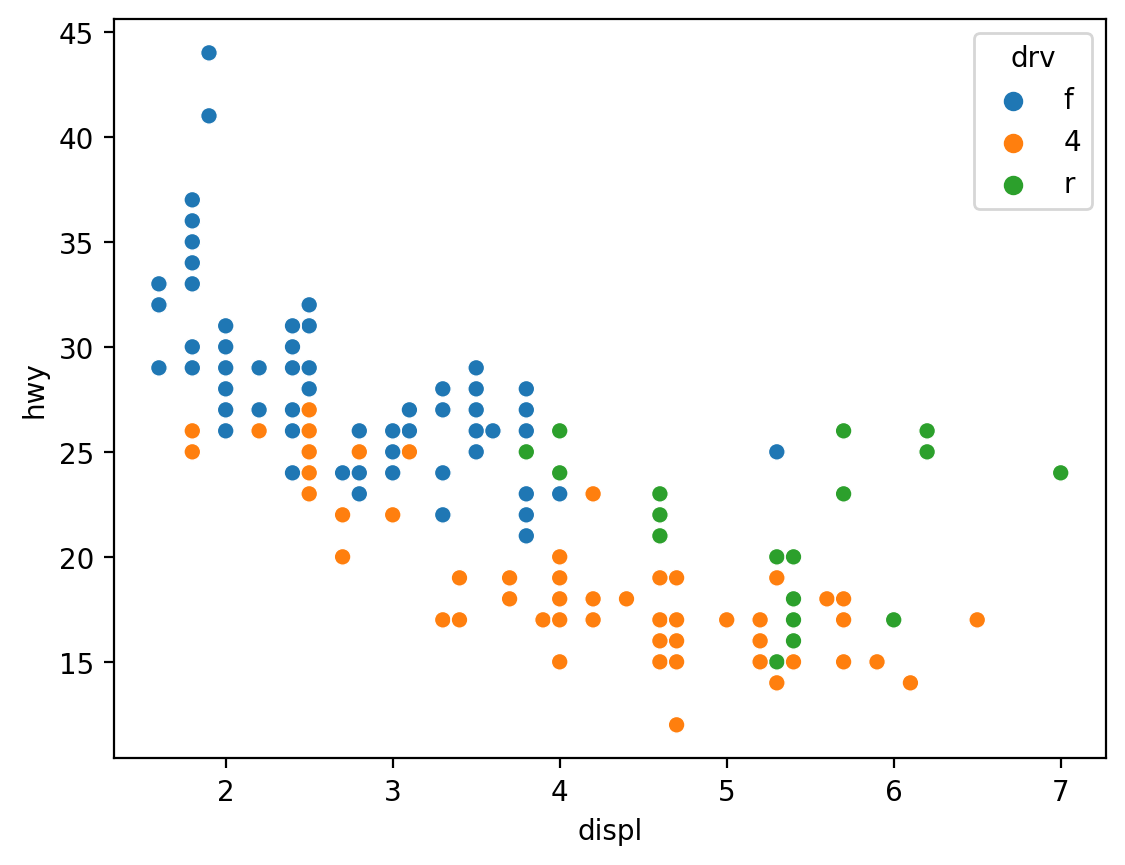

In [46]:
# drv(구동 방식)별로 표식 색깔 다르게 표현
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv')

In [51]:
# 그래프 활용하기(202쪽)

In [52]:
import pandas as pd

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# 그래프 설정 변경 (기본값 : dpi = 72, figsize = [6, 4], size = 10, font = sans-serif)
'''
plt.rcParams.update({'figure.dpi'     : '100',
                     'figure.figsize' : [6, 4],
                     'font.size'      : '10',
                     'font.family'    : 'Malgun Gothic'})
'''

plt.rcParams.update({'font.family'    : 'Malgun Gothic'})


### [개인 실습] 혼자서 해보기(204쪽)
- mpg 데이터와 midwest 데이터를 이용해 분석 문제를 해결해 보세요

#### Q1: mpg 데이터의 cty와 hwy 간 관계 - 산점도

In [49]:
# x축은 cty, y축은 hwy로 된 산점도


#### Q2: midwest에서 전체 인구와 아시아인 인구 간의 관계 - 산점도
- x축은 poptotal(전체 인구), y축은 popasian(아시아인 인구)
- 단, 전체 인구는 50만 명 이하, 아시아인 인구는 1만 명 이하인 지역만 산점도에 표시되게 설정하라

In [50]:
midwest = pd.read_csv('midwest.csv')
midwest.head(3)

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR


[(0.0, 500000.0), (0.0, 10000.0)]

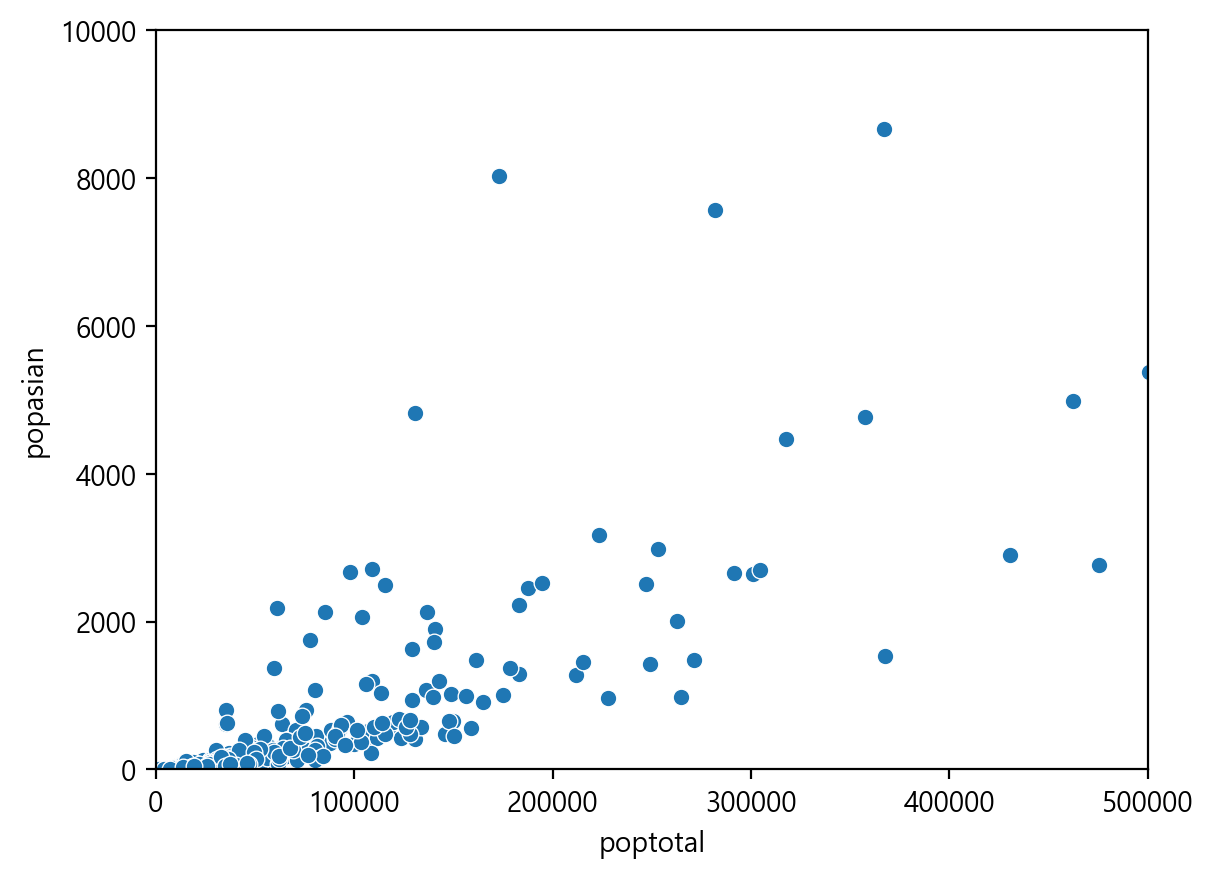

In [51]:
sns.scatterplot(data = midwest, x = 'poptotal', y = 'popasian') \
   .set(xlim = [0, 500000], ylim = [0, 10000])

## 08-3. 막대 그래프 - 집단 간 차이 표현하기(205-211쪽)
- 막대그래프(bar chart) : 데이터의 크기를 막대의 길이로 표현한 그래프
- 성별 소득 차이처럼 집단 간 차이를 표현할 때 자주 사용

### [Do it! 실습] 평균 막대 그래프 만들기(205쪽)
- 평균 막대 그래프 : 평균값의 크기를 막대 길이로 표현한 그래프

#### 집단별 평균표 만들기

In [52]:
# drv(구동 방식)별 hwy(고속도로 연비) 평균
df_mpg = mpg.groupby('drv') \
            .agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,mean_hwy
drv,
4,19.174757
f,28.160377
r,21.000000


In [53]:
# drv(구동 방식)별 hwy(고속도로 연비) 평균 
## - seaborn 그래프 위해서는, 위 결과에서 drv가 인덱스 아닌 변수 값으로 나오게 해야 함
## - df.groupby()에 as_index = False 입력하면 됨

df_mpg = mpg.groupby('drv', as_index = False) \
            .agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


#### 그래프 만들기
- sns.barplot() 이용
- data에 데이터 프레임을 지정, x축에 범주를 나타낸 변수, y축에 평균값을 나타낸 변수를 지정

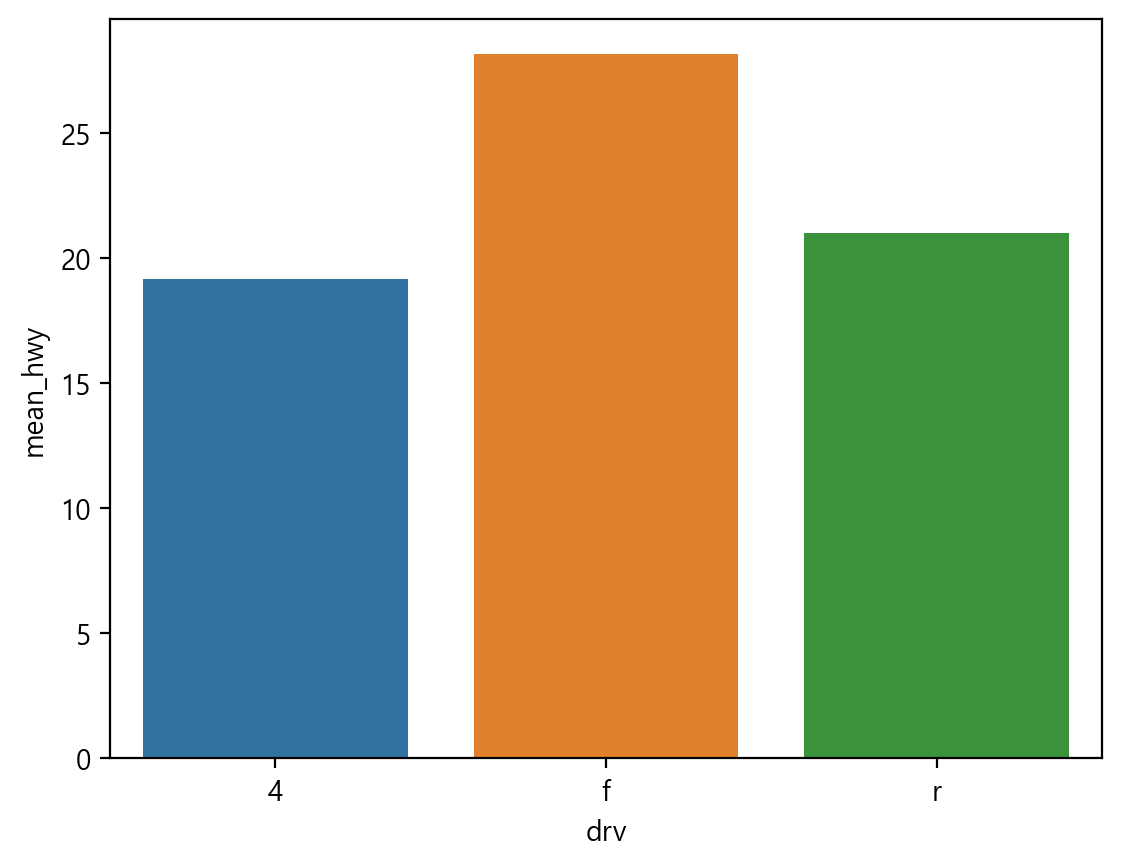

In [54]:
# drv별 hwy 평균을 나타낸 막대 그래프
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy');

#### 크기순으로 정렬하기
- 막대 정렬 순서 : 그래프 만드는데 사용한 데이터 프레임의 행 순서에 따름. ex) 4, f, r
- 막대 크기 순서로 정렬 : df.sort_values() 이용

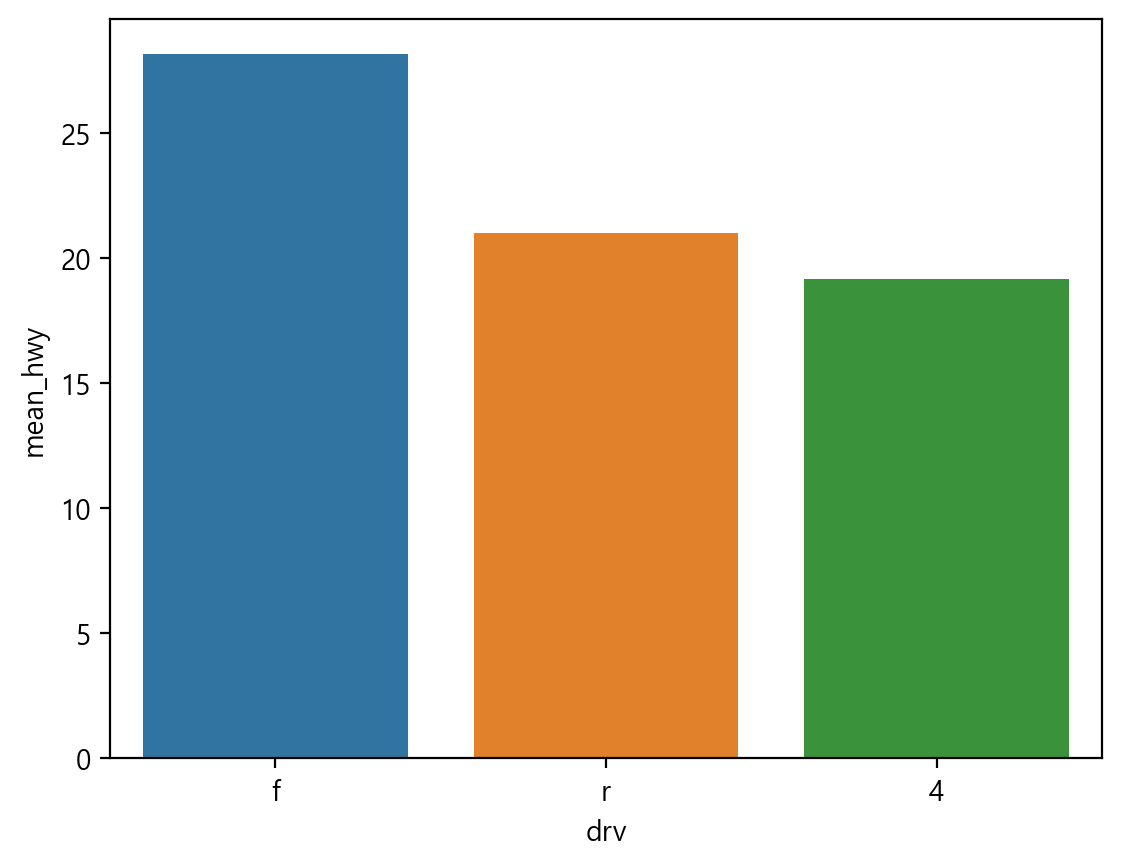

In [55]:
# 데이터 프레임 정렬하기
df_mpg = df_mpg.sort_values('mean_hwy', ascending = False)

# 막대 그래프 만들기
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy');

### [Do it! 실습] 빈도 막대 그래프 만들기(208쪽)
- 빈도 막대 그래프 : 값의 빈도(개수)를 막대 길이로 표현한 그래프
- 여러 집단의 빈도를 비교할 때 자주 사용

#### 집단별 빈도표 만들기
- 빈도 막대 그래프에 사용될 데이터 : 집단별 빈도를 담은 데이터 프레임. 
- df.agg()에 빈도를 구하는 함수 count()를 적용 -> '구동 방식 별 빈도' 담은 데이터 프레임

In [56]:
# 집단별 빈도표 만들기


#### 그래프 만들기
- sns.barplot()

#### sns.countplot()으로 빈도 막대 그래프 만들기
- df.groupby()와 df.agg() 이용하는 작업 생략하고,
- sns.countplot()로 곧바로 빈도 막대 그래프 만들 수 있다.

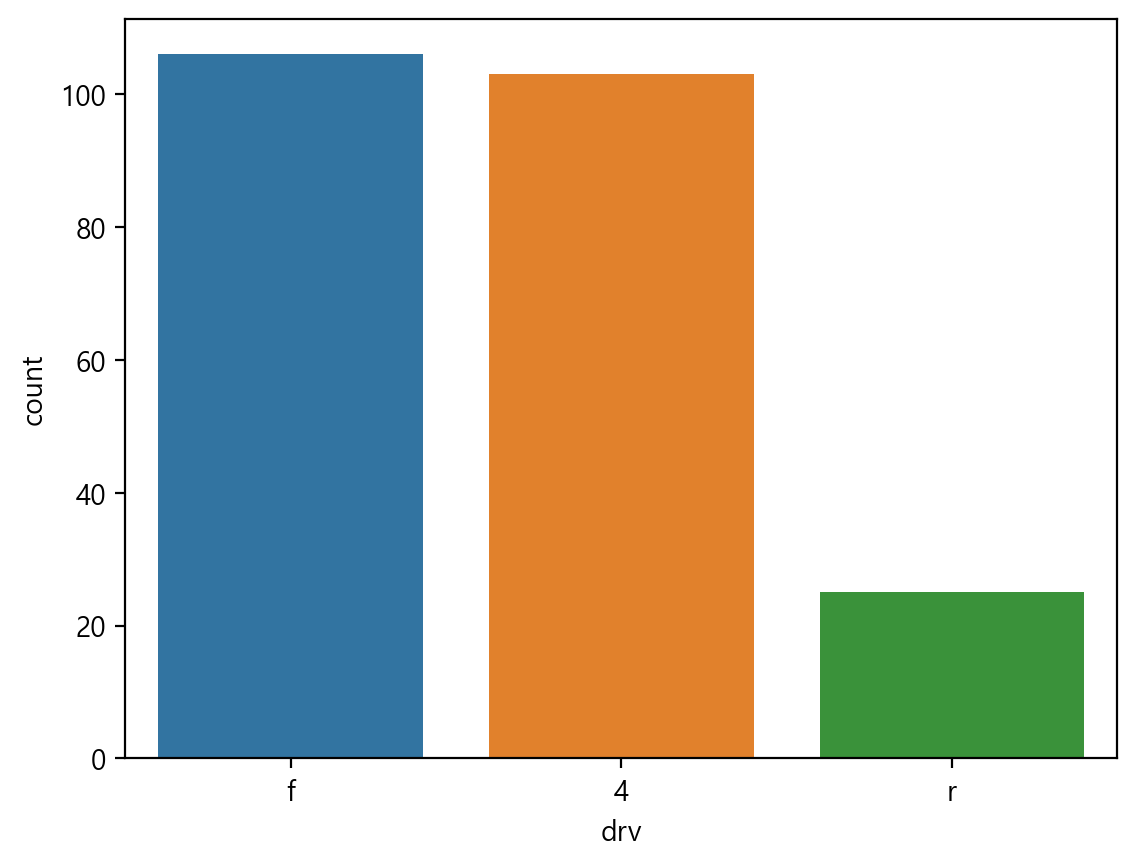

In [57]:
# 빈도 막대 그래프 만들기
sns.countplot(data = mpg, x = 'drv');

#### 막대 정렬하기
- order에 원하는 순서로 값을 입력해서 sns.countplot()으로 만든 그래프의 막대 정렬

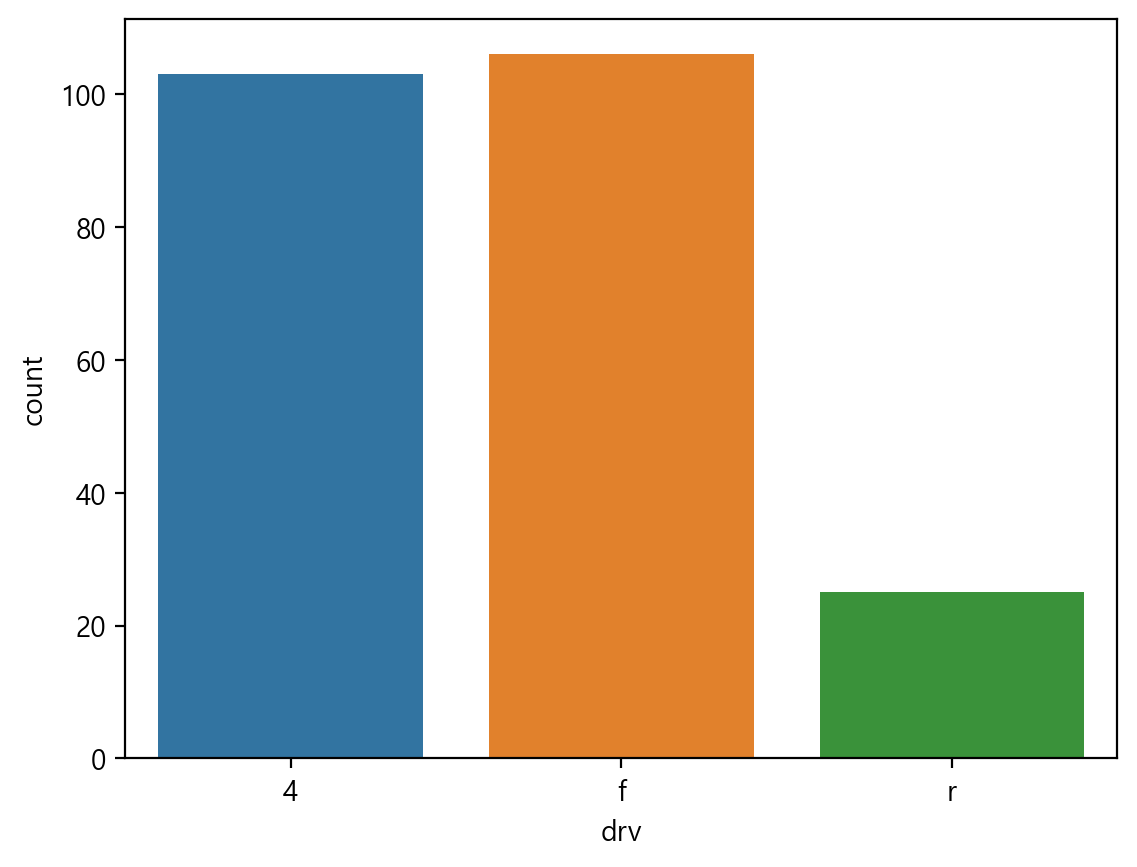

In [58]:
# 4, f, r 순으로 막대 정렬

sns.countplot(data = mpg, x = 'drv', order = ['4', 'f', 'r']);

In [70]:
# drv 빈도가 높은 순으로 막대 정렬할 때
## order에 mpg['drv'].value_counts().index 입력 -> 빈도 내림차순 정렬

In [59]:
# drv의 값을 빈도가 높은 값에서 낮은 값으로 내림차순 정렬
mpg['drv'].value_counts().index

Index(['f', '4', 'r'], dtype='object', name='drv')

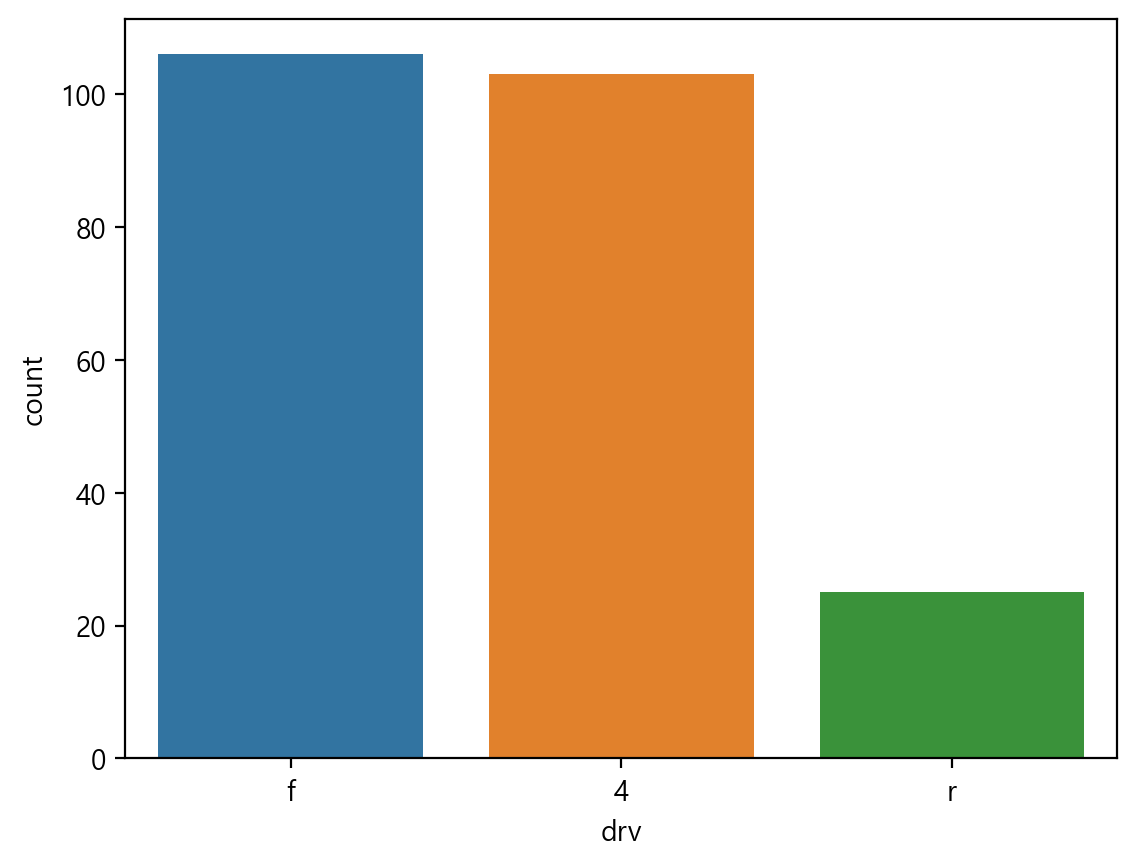

In [60]:
# drv 빈도를 내림차순으로 막대 정렬
sns.countplot(data = mpg, x = 'drv',
              order = mpg['drv'].value_counts().index);

### [개인 실습] 혼자서 해보기(211쪽)
- mpg 데이터를 이용해 분석 문제를 해결해 보세요

#### Q1: 'suv' 차종의 cty 평균이 가장 높은 회사 다섯 곳을 그래프로 표현
- 연비가 높은 순으로 정렬

In [61]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [63]:
# 'suv' 차종의 cty 평균이 가장 높은 회사 다섯 곳 데이터


In [65]:
# 막대그래프


#### Q2: 자동차 중에 어떤 category(자동차 종류)가 많은가?
- 막대그래프 이용해 자동차 종류별 빈도 표현하라 (빈도 높은 것부터 정렬)

## 08-4. 선 그래프 - 시간에 따라 달라지는 데이터 표현하기(212-217쪽)
- 선 그래프 : 데이터를 선으로 표현한 그래프. 시간에 따라 달라지는 데이터를 표현할 때 자주 사용.
    - 예) 환율, 주가지수 등 경제지표가 시간에 따라 변하는 양상
    - 시계열 데이터 : 일별 환율처럼, 일정 시간 간격을 두고 나열된 데이터
    - 시계열 그래프 : 시계열 데이터를 선으로 표현한 그래프

### [Do it! 실습] 시계열 그래프 만들기(212쪽)
- economics 데이터 : 미국의 여러 경제 지표를 월별로 나타낸 데이터
- economics 데이터 이용해서 시간에 따라 실업자 수가 변하는 시계열 그래프 작성
- economics 데이터 출처 : bit.ly/easypy_85

In [67]:
# economics 데이터 불러오기
import pandas as pd
economics = pd.read_csv('economics.csv')
print(economics.shape)
economics.head()

(574, 6)


,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


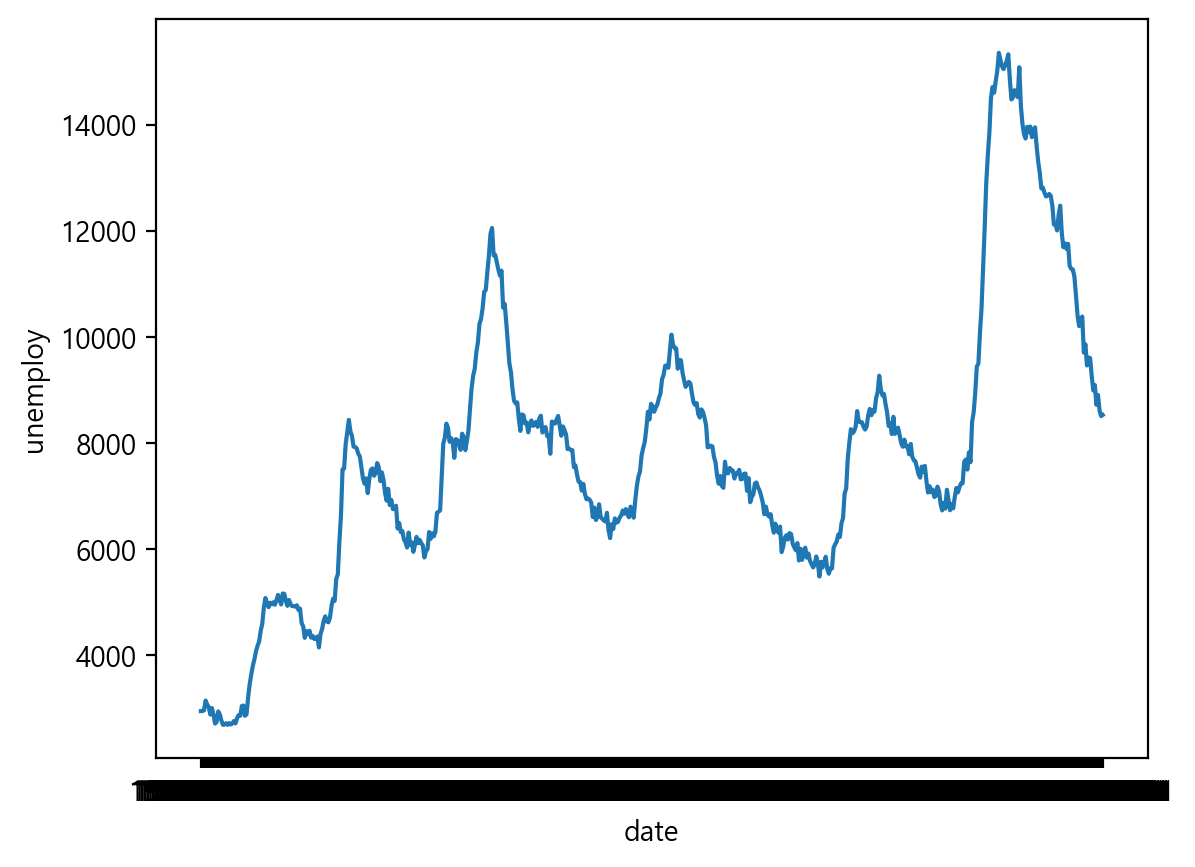

In [68]:
# sns.lineplot() 이용하여 x축에는 시간을 나타낸 data, y축에는 실업자 수 나타낸 unemploy를 지정
import seaborn as sns
sns.lineplot(data = economics, x = 'date', y = 'unemploy');

#### x축에 연도 표시하기
- 먼저 변수 타입을 날짜 시간 타입(datetime64)으로 변경해야 함
- 현재 상태 : date가 문자(object) 타입으로 되어 있다

##### 날짜 시간 타입 변수 만들기
- pd.to_datetime() 이용하면 변수 타입을 날짜 시간 타입으로 변경 가능

In [69]:
# 날짜 시간 타입 변수 만들기
economics['date2'] = pd.to_datetime(economics['date'])

# 변수 타입 확인
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [70]:
# 서로 다른 두 타입의 날짜 비교 : 값이 달라지진 않음
economics[['date', 'date2']]

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01
...,...,...
569,2014-12-01,2014-12-01
570,2015-01-01,2015-01-01
571,2015-02-01,2015-02-01
572,2015-03-01,2015-03-01


In [ ]:
# 변수가 날짜 시간 타입으로 되어 있으면 df.dt를 이용해 연, 월, 일을 추출할 수 있다

In [71]:
# 연 추출
economics['date2'].dt.year

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int32

In [72]:
# 월 추출
economics['date2'].dt.month

0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int32

In [73]:
# 일 추출
economics['date2'].dt.day

0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int32

#### 연도 변수 만들기

In [74]:
# 연도 변수 추가
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


#### x축에 연도 표시하기

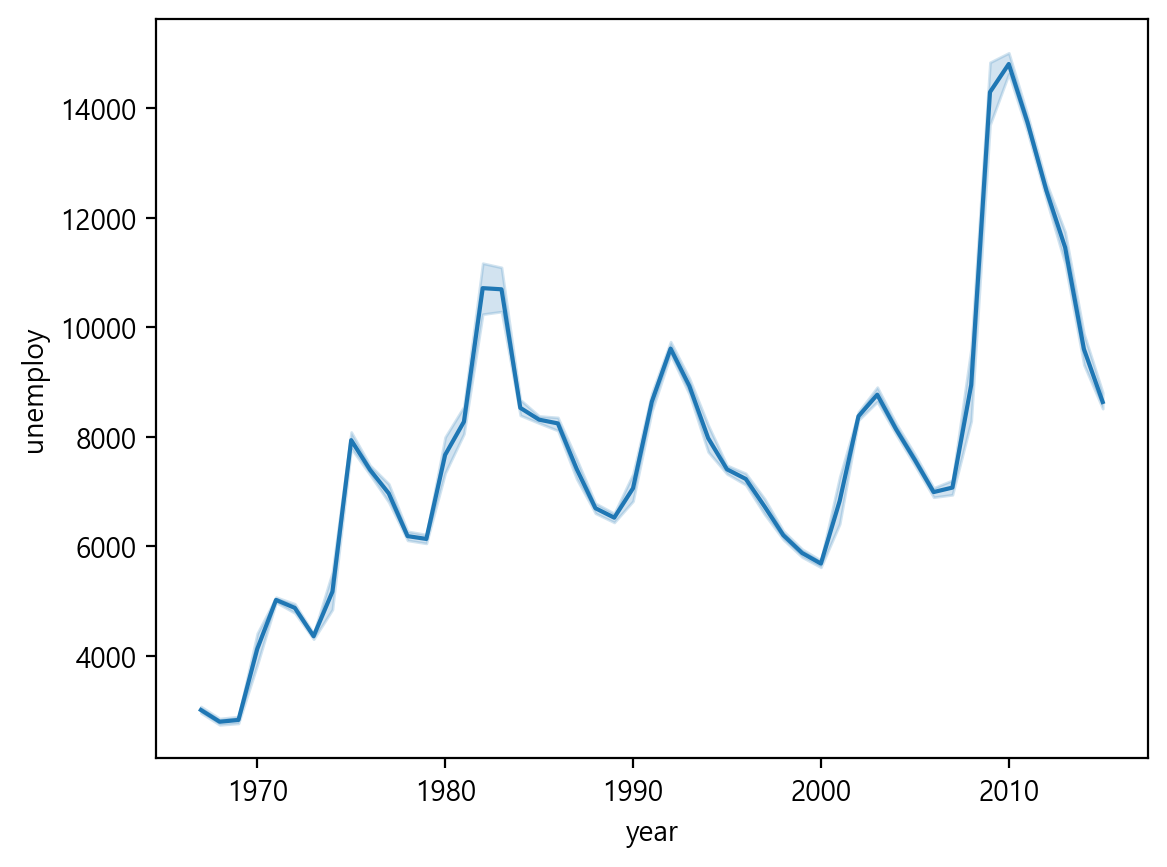

In [75]:
# x축에 연도 표시
sns.lineplot(data = economics, x = 'year', y = 'unemploy');

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_259884\2298223364.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = economics, x = 'year', y = 'unemploy', ci = None);


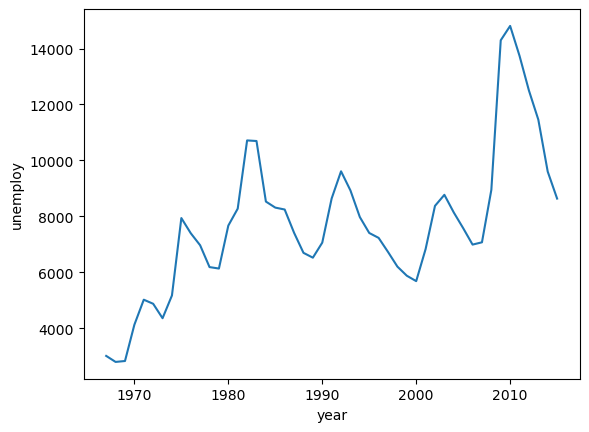

In [14]:
# 신뢰구간을 표시하지 않으려면 ci = None를 입력
sns.lineplot(data = economics, x = 'year', y = 'unemploy', ci = None);

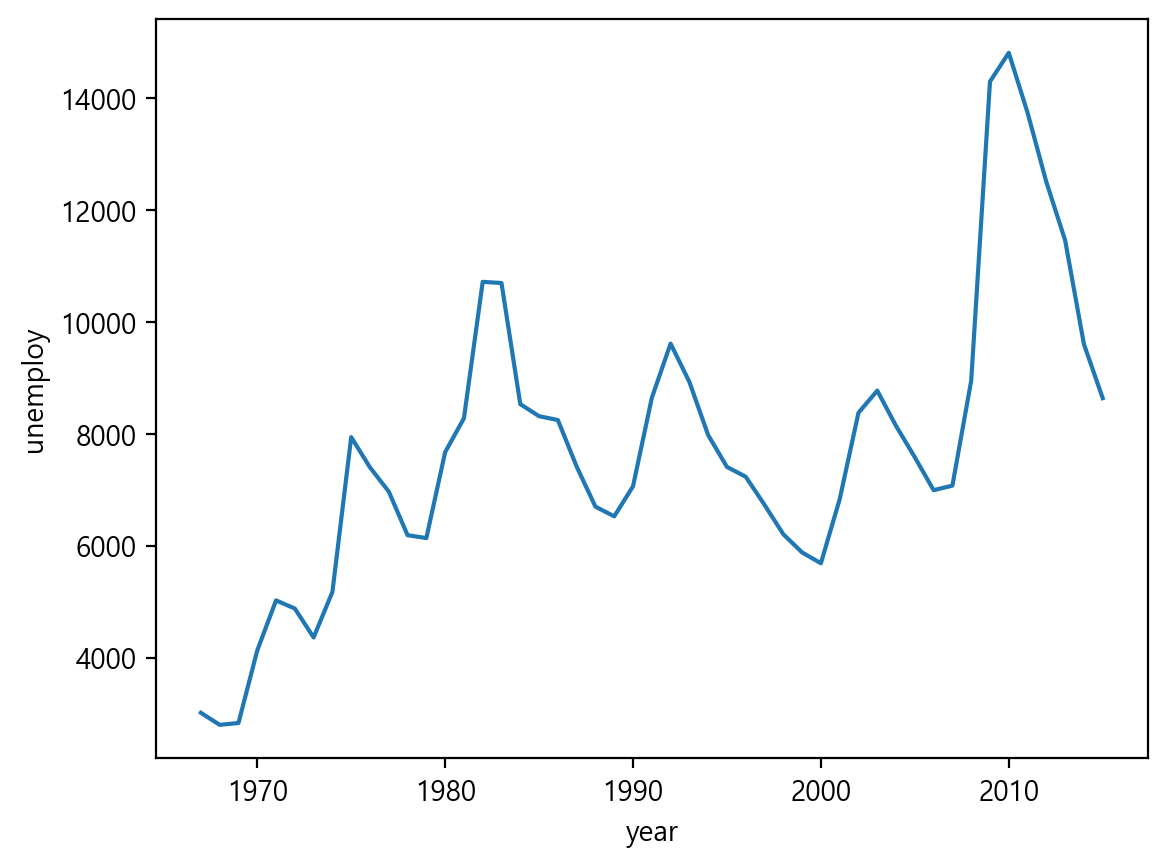

In [76]:
sns.lineplot(data = economics, x = 'year', y = 'unemploy', errorbar = None);

### [개인 실습] 혼자서 해보기(217쪽)
- economics.csv 데이터를 이용해 분석 문제를 해결해 보세요

#### Q1: psvert(개인 저축률)의 연도별 변화
- psvert가 시간에 따라 어떻게 변화했나. 연도별 개인 저출률 변화를 나타내는 시계열 그래프를 그려라

In [77]:
economics.head(3)

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967


#### Q2: psavert의 2014년 월별 변화 그래프

In [78]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
 7   year      574 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(1), object(1)
memory usage: 33.8+ KB


In [79]:
# 월 데이터를 만들어 변수 df_2014에 저장


In [80]:
# 그래프 그리기


## 08-5. 상자 그림 - 집단 간 분포 차이 표현하기(218-220쪽)

- 상자 그림(box plot): 데이터의 분포 또는 퍼져 있는 형태를 직사각형 상자 모양으로 표현한 그래프.
- 평균값을 볼 때보다 데이터의 특징을 더 자세히 이해할 수 있다.

### [Do it! 실습] 상자 그림 만들기(218쪽)

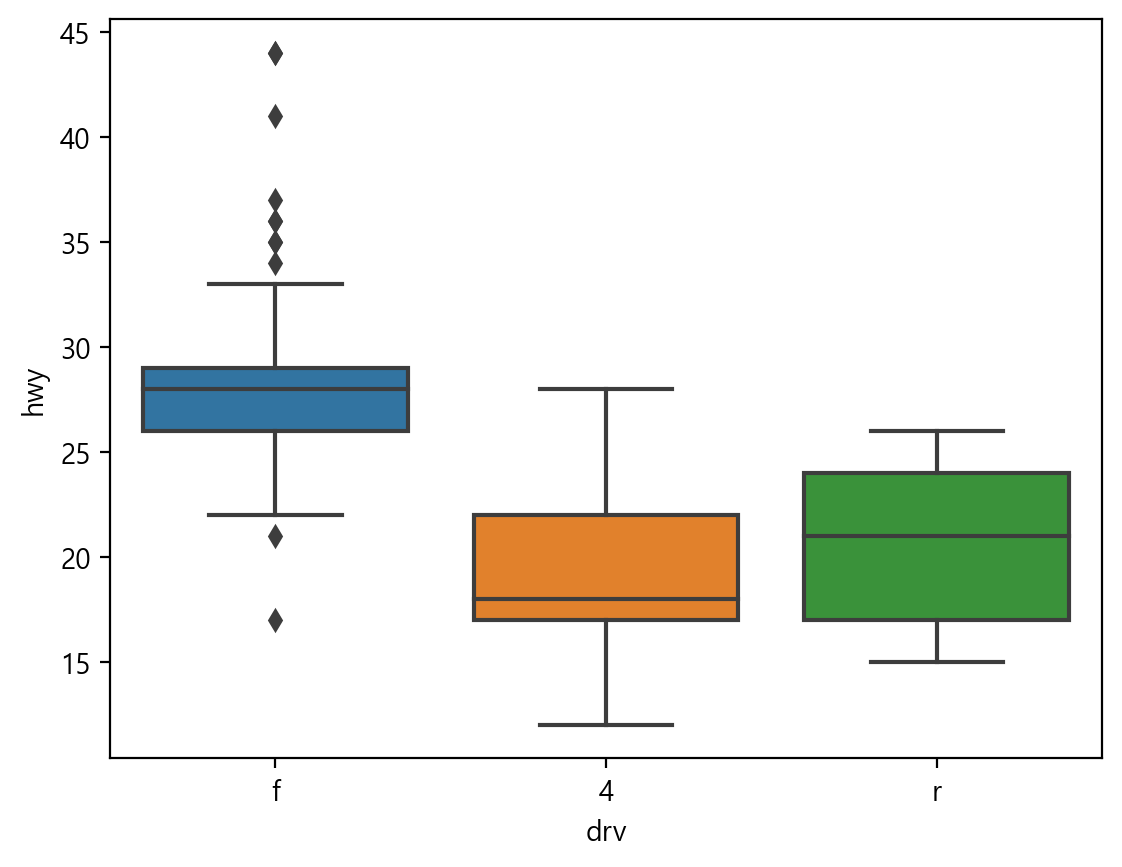

In [83]:
# mpg로 구동 방식별 고속도로 연비를 상자 그림으로 표현: 값 "자체" > 값 개수
mpg = pd. read_csv('mpg.csv')
sns.boxplot(data = mpg, x = 'drv', y = 'hwy');

In [84]:
mpg.groupby('drv') \
   .agg(n = ('hwy', 'count')) \
   .sort_values(by = 'n')

,n
drv,
r,25
4,103
f,106


In [86]:
# f 방식 자동차의 hwy 연비"값" 분포도

mpg[['drv', 'hwy']] \
.query('drv == "f"') \
.value_counts().sort_index(ascending = False)

drv  hwy
f    44      2
     41      1
     37      1
     36      2
     35      2
     34      1
     33      2
     32      4
     31      7
     30      4
     29     22
     28      6
     27     10
     26     22
     25      3
     24      9
     23      3
     22      3
     21      1
     17      1
Name: count, dtype: int64

In [87]:
# 정상 범위 벗어난 값

mpg_1 = mpg[['drv', 'hwy']] \
        .query('drv == "f"')
pct25 = mpg_1['hwy'].quantile(.25)
pct75 = mpg_1['hwy'].quantile(.75)
iqr = pct75 - pct25
lowest = pct25 - iqr * 1.5  # 하한
highest = pct75 + iqr * 1.5 # 상한
print(lowest)
print(highest)

21.5
33.5


### [개인 실습] 혼자서 해보기(220쪽)
- mpg 데이터를 이용해 분석 문제를 해결해 보세요

#### Q1: 자동차 종류별 도시 연비 비교
- category(자동차 종류)가 compact, subcompact, suv인 자동차의 cty(도시 연비)가 어떻게 다른지 비교해 보려 한다. 세 차종의 cty를 나타낸 상자 그림을 만들어라

In [88]:
# 세 차종만으로 된 데이터 프레임을 변수 result에 저장하라


In [90]:
# 위 세 자동차의 도시 연비를 상자 그림으로 나타내어라


# The End of Notebook